# Introduction to Machine Learning (Lab 7)

- Instructor: Jaemin Jo (Sungkyunkwan University)
- TA: Jaeung Lee (Sungkyunkwan University)
- Topics to cover: Logistic Regression, Regularization, Training and Evaluation

## 1. Logistic Regression


### 1.1. Packages
- [numpy](https://www.numpy.org): Fundamental package for scientific computing with Python.
- [matplotlib](https://matplotlib.org): A comprehensive library for creating static, animated, and interactive visualizations in Python.
- [pandas](https://pandas.pydata.org): Open source package for data analysis and manipulation.


### 1.2. Problem Statement
[Banknote Authentication Dataset](https://archive.ics.uci.edu/dataset/267/banknote+authentication)

The Banknote Authentication Dataset consists of data about banknotes: whether they are authentic or fake. In this part, we would like to fit a logistic regression model on this dataset to determine if a given banknote is authentic or fake!

Each column describes the following attributes:

- variance: Variance of Wavelet Transformed image.
- skewness: Skewness of Wavelet Transformed image.
- curtosis: Curtosis of Wavelet Transformed image.
- entropy: Entropy of image.
- class: Class label (0 for fake, 1 for authentic).

In [1]:
# Load the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"

dataset = pd.read_csv(url, header=None)

# Set column names
dataset.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']

# Display top 5 elements
dataset.head(5)

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [2]:
# Separate data and label from the dataset.
data = dataset.drop(labels=['class'], axis=1, inplace=False).to_numpy()
label = dataset['class'].to_numpy()
label = label.astype(float)

# Check data statistics
print("The shape of data is", data.shape)
print("The shape of label is", label.shape)
print()

The shape of data is (1372, 4)
The shape of label is (1372,)



In [3]:
# Normalize the data
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
print("The first five elements of normalized data are\n", data[:5])


The first five elements of normalized data are
 [[ 1.12180565  1.14945512 -0.97597007  0.35456135]
 [ 1.44706568  1.06445293 -0.89503626 -0.12876744]
 [ 1.20780971 -0.77735215  0.12221838  0.61807317]
 [ 1.06374236  1.29547754 -1.25539712 -1.14402883]
 [-0.03677175 -1.0870383   0.73673042  0.09658697]]


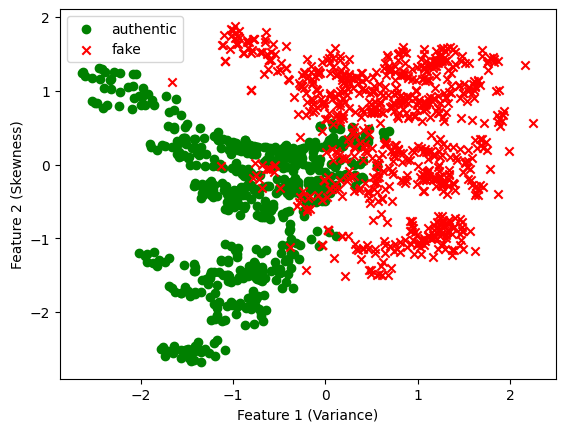

In [4]:
# Visualize two features (1st & 2nd dimension of the feature)
authentic = (label == 1)
fake = (label == 0)

plt.scatter(data[authentic, 0], data[authentic, 1], marker='o', c='g', label="authentic")
plt.scatter(data[fake, 0], data[fake, 1], marker='x', c='r', label="fake")
plt.xlabel("Feature 1 (Variance)")
plt.ylabel("Feature 2 (Skewness)")
plt.legend()
plt.show()

### 1.3. Sigmoid Function

$$\sigma(x) = \frac{1}{1+e^{-x}}$$
Compute the sigmoid of x.

In [5]:
def sigmoid(x):
    """
    Args:
        x (np.ndarray): Shape (N, ) or any shape

    Returns:
        sigma (np.ndarray): Sigmoid values of the given input x, same shape as x
    """
    # [NOTE] Write your code here!
    sigma = 1/(1+np.exp(-x))

    return sigma

# Test the sigmoid function
x = np.array([-1, 0, 1])
for i in x:
    print("Sigmoid of x:", sigmoid(x[i]))

Sigmoid of x: 0.7310585786300049
Sigmoid of x: 0.2689414213699951
Sigmoid of x: 0.5


### 1.4. Binary Cross-Entropy Loss

$$\hat{y}^{(i)} = \sigma(w^T x^{(i)} + b)$$

$$BCE(w, b) = - \sum_{i=1}^{N} y^{(i)} \cdot log(\hat{y}^{(i)}) + (1-y^{(i)}) \cdot log(1-\hat{y}^{(i)})$$


- N is the number of training examples in the dataset.
- $ y^{(i)} $ is the true label.
- $ \hat{y}^{(i)} $ is the predicted value (output of the sigmoid function).


Compute the bceloss of the logistic regression model, given data and label.

In [11]:
def compute_bceloss(data, label, w, b):
    """
    Args:
        data    (np.ndarray): Shape (N, ) Input to the model
        label   (np.ndarray): Shape (N, ) Label of the data
        w       (np.ndarray): Weight of the logistic regression model
        b       (float): Bias of the logistic regression model

    Return:
        total_loss (float): Total bceloss of the logistic regression model, given data and label
    """
    total_loss = 0

    #[NOTE] write your code here!
    y_hat = sigmoid(np.dot(data, w)+b)
    total_loss = -np.sum(label * np.log(y_hat) + (1 - label) * np.log(1 - y_hat))

    return total_loss

w = np.zeros(4)
b = 0.0

compute_bceloss(data, label, w, b)

950.997931728245

### 1.5. Gradient Descent
$$
\frac{\partial BCE(\mathbf{w},b)}{\partial w_j}  = \sum\limits_{i = 1}^{N} (\hat{y}^{(i)} - {y}^{(i)})x_{j}^{(i)}
$$
$$
\frac{\partial BCE(\mathbf{w},b)}{\partial b}  = \sum\limits_{i = 1}^{N} (\hat{y}^{(i)} - {y}^{(i)})
$$
- N is the number of training examples in the dataset.
- $ y^{(i)} $ is the true label.
- $ \hat{y}^{(i)} $ is the predicted value (output of the sigmoid function).

Compute the gradient of the loss w.r.t weight & bias of model, given data and label.

In [12]:
def compute_gradient(data, label, w, b):
    """
    Args:
        data    (np.ndarray): Shape (N, ) Input to the model
        label   (np.ndarray): Shape (N, ) Label of the data
        w       (np.ndarray): Weight of the logistic regression model
        b       (float): Bias of the logistic regression model

    Return:
       grad_w   (np.ndarray): The gradient of the loss w.r.t weight w
       grad_b   (float): The gradient of the loss w.r.t bias b
    """
    grad_w, grad_b = 0, 0

    #[NOTE] write your code here!
    y_hat = sigmoid(np.dot(data, w)+b)
    
    grad_w += np.dot(data.T, y_hat - label)
    grad_b += np.sum(y_hat - label)

    return grad_w, grad_b

compute_gradient(data, label, w, b)

(array([ 494.18144812,  303.17792519, -106.27761897,   15.96972767]), 76.0)

### Exercise 1: Complete the code of gradient descent algorithm
$$
w := w - \alpha \cdot \frac{\partial L}{\partial w}
$$

$$
b := b - \alpha \cdot \frac{\partial L}{\partial b}
$$


- $ \alpha $ is the learning rate.
- $ L $ is the loss function.

Performs batch gradient descent to obtain weight and bias of the logistic regression model.

In [13]:
def gradient_descent(data, label, w_init, b_init, iters=1500, lr=0.001):
    """
    Args:
      data    (np.ndarray): Shape (N,)
      label   (np.ndarray): Shape (N,)
      w_init  (np.ndarray): Initial value of weight of the model
      b_init  (float): Initial values of bias of the model
      lr      (float): Learning rate
      iters   (int): Number of iterations to run gradient descent

    Returns
      w             (np.ndarray): Weight of the logistic regression model obtained with BGD
      b             (float): Bias of the logistic regression model obtained with BGD
      loss_history  (list): loss values of every iteration steps
      w_history     (list): w values of every iteration steps
      b_history     (list): b values of every iteration steps
    """
    loss_history = []
    w_history = []
    b_history = []
    w = w_init
    b = b_init

    for i in range(iters):
        # [NOTE] write your code here!
        # (1) Compute each gradient (grad_w, grad_b)
        # (2) Update w using (1)
        # (3) Update b using (1)
        # (4) Compute loss using (2, 3)
        #...........................#
        grad_w, grad_b = compute_gradient(data, label, w, b)
        
        w -= lr * grad_w
        b -= lr * grad_b
        
        loss = compute_bceloss(data, label, w, b)

        loss_history.append(loss)
        w_history.append(w.copy())
        b_history.append(b)

        # print loss for every 100 iterations
        if i % 100 == 99:
            print(f"[ {i + 1:4}/{iters} ] BCELoss: {loss:.4f}")

    return w, b, loss_history, w_history, b_history

obtain w and b with gradient descent

In [14]:
# initial values of w and b
w_init, b_init = np.random.randn(4), .0

# hyperparameters for gradient descent algorithm
iters = 1500
learning_rate = 0.001

w, b, loss_history, w_history, b_history = gradient_descent(
                                                data, label, w_init, b_init,
                                                iters=iters,
                                                lr=learning_rate,
                                            )

print("w,b found by gradient descent:", w, b)


[  100/1500 ] BCELoss: 97.1099
[  200/1500 ] BCELoss: 73.0024
[  300/1500 ] BCELoss: 63.3875
[  400/1500 ] BCELoss: 57.8644
[  500/1500 ] BCELoss: 54.1495
[  600/1500 ] BCELoss: 51.4201
[  700/1500 ] BCELoss: 49.2990
[  800/1500 ] BCELoss: 47.5851
[  900/1500 ] BCELoss: 46.1604
[ 1000/1500 ] BCELoss: 44.9502
[ 1100/1500 ] BCELoss: 43.9045
[ 1200/1500 ] BCELoss: 42.9884
[ 1300/1500 ] BCELoss: 42.1768
[ 1400/1500 ] BCELoss: 41.4508
[ 1500/1500 ] BCELoss: 40.7961
w,b found by gradient descent: [-7.26866799 -7.95536306 -7.23634491  0.12036953] -2.9369519874805197


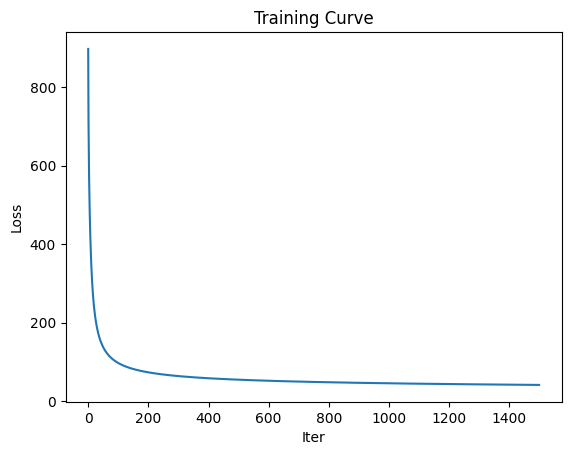

In [15]:
loss_history = loss_history

# plot training curve
plt.plot(range(len(loss_history)), loss_history)
plt.title("Training Curve")
plt.xlabel("Iter")
plt.ylabel("Loss")
plt.show()

### 1.6. L2 Regularization
$$\hat{y}^{(i)} = \sigma(w^T x^{(i)} + b)$$

$$BCE(w, b) = - \sum_{i=1}^{N} y^{(i)} \cdot log(\hat{y}^{(i)}) + (1-y^{(i)}) \cdot log(1-\hat{y}^{(i)})$$

$$L(w, b) = BCE(w, b) + \frac{\lambda}{2} \| w\|^2$$
Compute the BCELoss with L2 regularization of the logistic regression model, given data and label.

In [16]:
def compute_l2_reg_loss(data, label, w, b, l2_lambda=0.5):
    """
    Args:
        data (np.ndarray): Shape (N, D) Input to the model
        label (np.ndarray): Shape (N, ) Labels of the data
        w (np.ndarray): Shape (D, ) Weights of the logistic regression model
        b (float): Bias of the logistic regression model
        l2_lambda (float): Regularization strength

    Returns:
        total_loss (float): Total BCELoss with L2 regularization
    """
    bce_loss = compute_bceloss(data, label, w, b)
    # [NOTE] Write your code here!
    total_loss = bce_loss + l2_lambda/2 * np.sum(w**2)

    return total_loss

### Exercise 2: Compute the gradient of the loss with L2 regularization with respect to weights and bias.


In [17]:
def compute_gradient_l2(data, label, w, b, l2_lambda=0.5):
    """
    Args:
        data (np.ndarray): Shape (N, D) Input to the model
        label (np.ndarray): Shape (N, ) Labels of the data
        w (np.ndarray): Shape (D, ) Weights of the logistic regression model
        b (float): Bias of the logistic regression model
        l2_lambda (float): Regularization strength

    Returns:
        grad_w (np.ndarray): Shape (D, ) Gradient with respect to weights w
        grad_b (float): Gradient with respect to bias b
    """
    # [NOTE] Write your code here!
    # (1) Compute each gradient (grad_w, grad_b)
    # (2) Add regularization term
    #............................#
    grad_w, grad_b = compute_gradient(data, label, w, b)
    grad_w += l2_lambda * w
    
    return grad_w, grad_b

Performs batch gradient descent with L2 regularization to obtain weights and bias of the logistic regression model.

In [18]:
def gradient_descent_l2(data, label, w_init, b_init, iters=1500, lr=0.01, l2_lambda=0.5):
    """
    Args:
        data (np.ndarray): Shape (N, D)
        label (np.ndarray): Shape (N, )
        w_init (np.ndarray): Initial value of weights of the model
        b_init (float): Initial value of bias of the model
        lr (float): Learning rate
        iters (int): Number of iterations to run gradient descent
        l2_lambda (float): Regularization strength

    Returns:
        w (np.ndarray): Optimized weights of the logistic regression model
        b (float): Optimized bias of the logistic regression model
        loss_history (list): Loss values at every iteration step
        w_history (list): Weights at every iteration step
        b_history (list): Bias values at every iteration step
    """
    loss_history = []
    w_history = []
    b_history = []
    w = w_init.copy()
    b = b_init

    for i in range(iters):
        grad_w, grad_b = compute_gradient_l2(data, label, w, b, l2_lambda)
        w -= lr * grad_w
        b -= lr * grad_b

        loss = compute_l2_reg_loss(data, label, w, b, l2_lambda)
        loss_history.append(loss)
        w_history.append(w.copy())
        b_history.append(b)

        # Print loss every 100 iterations
        if i % 100 == 99:
            print(f"[{i + 1:4}/{iters}] BCELoss with L2 Regularization: {loss:.4f}")

    return w, b, loss_history, w_history, b_history

In [19]:
# initial values of w and b
w_init, b_init = np.random.randn(4), .0

# hyperparameters for gradient descent algorithm
iters = 1500
learning_rate = 0.001
l2_lambda = 0.9

# Obtain weights and bias with gradient descent with L2 regularization
w_l2, b_l2, loss_history_l2, w_history_l2, b_history_l2 = gradient_descent_l2(
    data, label, w_init, b_init,
    iters=iters,
    lr=learning_rate,
    l2_lambda=l2_lambda
)

print("\nWeights and bias found by gradient descent with L2 regularization:")
print("Weights:", w_l2)
print("Bias:", b_l2)

[ 100/1500] BCELoss with L2 Regularization: 112.2756
[ 200/1500] BCELoss with L2 Regularization: 100.1700
[ 300/1500] BCELoss with L2 Regularization: 96.7391
[ 400/1500] BCELoss with L2 Regularization: 95.4119
[ 500/1500] BCELoss with L2 Regularization: 94.8253
[ 600/1500] BCELoss with L2 Regularization: 94.5465
[ 700/1500] BCELoss with L2 Regularization: 94.4082
[ 800/1500] BCELoss with L2 Regularization: 94.3376
[ 900/1500] BCELoss with L2 Regularization: 94.3008
[1000/1500] BCELoss with L2 Regularization: 94.2815
[1100/1500] BCELoss with L2 Regularization: 94.2712
[1200/1500] BCELoss with L2 Regularization: 94.2656
[1300/1500] BCELoss with L2 Regularization: 94.2627
[1400/1500] BCELoss with L2 Regularization: 94.2611
[1500/1500] BCELoss with L2 Regularization: 94.2602

Weights and bias found by gradient descent with L2 regularization:
Weights: [-5.03588208 -5.18073481 -4.73997998  0.23438982]
Bias: -1.629836581539081


## 2. Training and Evaluation


### 2.1. Packages
- [numpy](https://www.numpy.org): Fundamental package for scientific computing with Python.
- [matplotlib](https://matplotlib.org): A comprehensive library for creating static, animated, and interactive visualizations in Python.
- [pandas](https://pandas.pydata.org): Open source package for data analysis and manipulation.
- [seaborn](https://seaborn.pydata.org/): Python data visualization library based on matplotlib

### 2.2. Problem Statement
In this notebook, we will explore the concepts of overfitting, regularization, cross-validation, confusion matrix, and evaluation metrics (accuracy, precision, recall, F1 score) using the Breast Cancer Wisconsin dataset. We will train a logistic regression model to classify whether a tumor is malignant or benign.

#### Features
- Radius (mean of distances from center to points on the perimeter)
- Texture (standard deviation of gray-scale values)
- Perimeter
- Area
- Smoothness (local variation in radius lengths)
- Compactness (perimeter² / area - 1.0)
- Concavity (severity of concave portions of the contour)
- Concave points (number of concave portions of the contour)
- Symmetry
- Fractal dimension ("coastline approximation" - 1)
- ...etc

#### Target
- Diagnosis: Malignant (0) or Benign (1)

In [20]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

# Create a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Display top 5 rows
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Let's explore the dataset to understand it better.

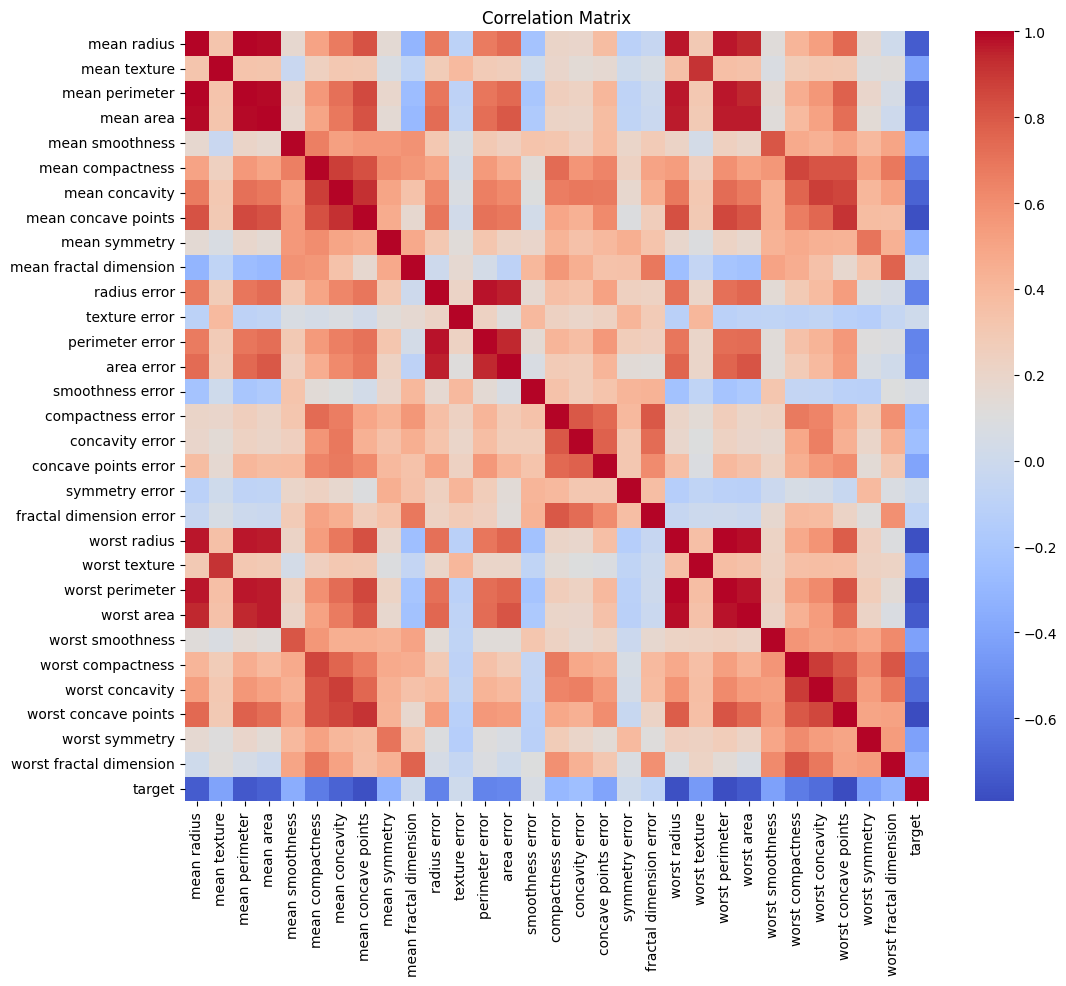

In [21]:
# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Due to the large number of features, we will select a subset of features that are most correlated with the target variable.

In [22]:
# Get the correlation of features with the target
corr_with_target = df.corr()['target'].abs().sort_values(ascending=False)
corr_with_target

target                     1.000000
worst concave points       0.793566
worst perimeter            0.782914
mean concave points        0.776614
worst radius               0.776454
mean perimeter             0.742636
worst area                 0.733825
mean radius                0.730029
mean area                  0.708984
mean concavity             0.696360
worst concavity            0.659610
mean compactness           0.596534
worst compactness          0.590998
radius error               0.567134
perimeter error            0.556141
area error                 0.548236
worst texture              0.456903
worst smoothness           0.421465
worst symmetry             0.416294
mean texture               0.415185
concave points error       0.408042
mean smoothness            0.358560
mean symmetry              0.330499
worst fractal dimension    0.323872
compactness error          0.292999
concavity error            0.253730
fractal dimension error    0.077972
smoothness error           0

We will use the top 10 features for our model.

In [23]:
top_features = corr_with_target.index[1:11]  # Exclude 'target' itself

X = df[top_features]
y = df['target']

print("Top 10 features:\n", top_features)

Top 10 features:
 Index(['worst concave points', 'worst perimeter', 'mean concave points',
       'worst radius', 'mean perimeter', 'worst area', 'mean radius',
       'mean area', 'mean concavity', 'worst concavity'],
      dtype='object')


We will split the data into training and test sets.

In [24]:
from sklearn.model_selection import train_test_split

# Split the data (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Logistic regression can benefit from feature scaling.

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit only on training data to prevent data leakage
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Training a Logistic Regression Model

In [26]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train_scaled, y_train)

# Predict on training and test sets
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

print(y_train_pred)
print(y_test_pred)

[1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0
 1 0 1 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1
 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1
 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1
 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 0
 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0
 0 1 0 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0
 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1]
[1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1

### 2.3. Confusion Matrix
The confusion matrix helps visualize the performance of the model.
- True Positives (TP): Correctly predicted positive cases.
- True Negatives (TN): Correctly predicted negative cases.
- False Positives (FP): Incorrectly predicted positive cases.
- False Negatives (FN): Incorrectly predicted negative cases.

Computes the confusion matrix components: TP, TN, FP, FN.

In [28]:
def compute_confusion_matrix(y_true, y_pred):
    """
    Args:
        y_true (array-like): True labels.
        y_pred (array-like): Predicted labels.

    Returns:
        TP (int): Number of True Positives.
        TN (int): Number of True Negatives.
        FP (int): Number of False Positives.
        FN (int): Number of False Negatives.
    """
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    
    return TP, TN, FP, FN

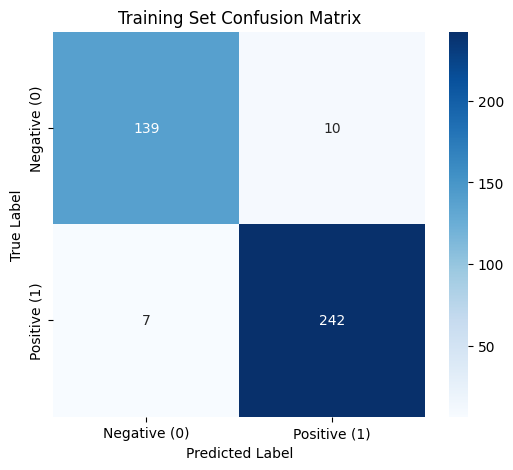

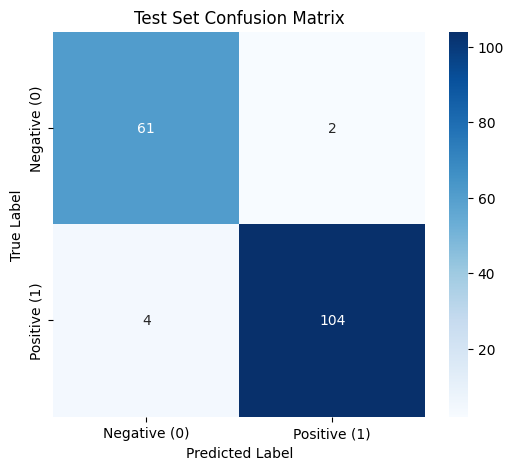

In [29]:
def plot_confusion_matrix_from_values(TP, TN, FP, FN, dataset_type='Training'):
    cm = np.array([[TN, FP],
                   [FN, TP]])
    classes = ['Negative (0)', 'Positive (1)']
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'{dataset_type} Set Confusion Matrix')
    plt.show()

# Predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Training set confusion matrix
TP_train, TN_train, FP_train, FN_train = compute_confusion_matrix(y_train, y_train_pred)
plot_confusion_matrix_from_values(TP_train, TN_train, FP_train, FN_train, dataset_type='Training')

# Test set confusion matrix
TP_test, TN_test, FP_test, FN_test = compute_confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix_from_values(TP_test, TN_test, FP_test, FN_test, dataset_type='Test')


### 2.4. Evaluation Metrics

$$
\begin{align*}
\text{Accuracy} &= \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}} &
\text{Precision} &= \frac{\text{TP}}{\text{TP} + \text{FP}} \\[5pt]
\text{Recall} &= \frac{\text{TP}}{\text{TP} + \text{FN}} &
\text{F1 Score} &= 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
\end{align*}
$$
- Accuracy: The proportion of correct predictions over total predictions.
- Precision: The proportion of positive identifications that were actually correct.
- Recall: The proportion of actual positives that were identified correctly.
- F1 Score: The harmonic mean of precision and recall.

### Exercise 3: Compute accuracy, precision, recall, and F1 score

Calculates and prints the evaluation metrics: accuracy, precision, recall, and F1 score.

In [30]:
def evaluate_performance(y_true, y_pred, dataset_type='Training'):
    """
    Args:
        y_true (array-like): True labels.
        y_pred (array-like): Predicted labels.
        dataset_type (str): Type of the dataset (e.g., 'Training', 'Test').
    """
    TP, TN, FP, FN = compute_confusion_matrix(y_true, y_pred)

    # [NOTE] Write your code here!
    # Accuracy
    accuracy = (TP+TN)/(TP+TN+FP+FN)

    # Precision (handle division by zero)
    try:
        precision = (TP)/(TP+FP)
    except ZeroDivisionError:
        precision = 0

    # Recall (handle division by zero)
    try:
        recall = (TP)/(TP+FN)
    except ZeroDivisionError:
        recall = 0

    # F1 Score (handle division by zero)
    try:
        f1 = 2*(precision*recall)/(precision+recall)
    except ZeroDivisionError:
        f1 = 0


    print(f"{dataset_type} Set Metrics:")
    print(f"Accuracy : {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"F1 Score : {f1:.4f}")
    print()

# Predictions on training and test sets
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Evaluate on training set
evaluate_performance(y_train, y_train_pred, 'Training')

# Evaluate on test set
evaluate_performance(y_test, y_test_pred, 'Test')


Training Set Metrics:
Accuracy : 0.9573
Precision: 0.9603
Recall   : 0.9719
F1 Score : 0.9661

Test Set Metrics:
Accuracy : 0.9649
Precision: 0.9811
Recall   : 0.9630
F1 Score : 0.9720



### 2.5. Cross-Validation
To select the best regularization strength, we can use cross-validation.

Cross-validation involves partitioning the data into subsets, training the model on some subsets (training folds), and validating it on the remaining subset (validation fold). We will use 5-fold cross-validation.

In [31]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': np.logspace(-4, 4, 9),  # Try Regularization values from 1e-4 to 1e4 (C = 1 / lambda)
    'penalty': ['l1', 'l2'], # L1, L2 Regualization
    'solver': ['saga'],
    'max_iter': [10000]
}

# Initialize logistic regression model
log_reg = LogisticRegression()

# Initialize GridSearchCV for scoring accuracy and 5-fold cross-validation
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1) # LR을 90번 수행

# Perform grid search
grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04]),
                         'max_iter': [10000], 'penalty': ['l1', 'l2'],
                         'solver': ['saga']},
             scoring='accuracy')

In [32]:
# Access cv_results_
results_df = pd.DataFrame(grid_search.cv_results_)

# Select columns related to split test scores
split_columns = [col for col in results_df.columns if 'split' in col and '_test_score' in col]

# Combine with hyperparameters
cv_results_detailed = results_df[['param_C', 'param_penalty'] + split_columns]

# Print the detailed cross-validation results with each combination on a single line
print(cv_results_detailed.to_string(index=False))

 param_C param_penalty  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score
  0.0001            l1             0.6250             0.6250             0.6250           0.632911           0.620253
  0.0001            l2             0.6250             0.6250             0.6250           0.632911           0.620253
   0.001            l1             0.6250             0.6250             0.6250           0.632911           0.620253
   0.001            l2             0.8125             0.8500             0.8625           0.835443           0.822785
    0.01            l1             0.6500             0.7000             0.6500           0.670886           0.683544
    0.01            l2             0.9125             0.9250             0.9500           0.924051           0.911392
     0.1            l1             0.9500             0.9250             0.9500           0.936709           0.962025
     0.1            l2             0.9500             0.

Best Parameters and Best Cross-Validation Score

In [33]:
print("Best Parameters Found:")
print(grid_search.best_params_)
print("\nBest Cross-Validation Accuracy: {:.4f}".format(grid_search.best_score_))


Best Parameters Found:
{'C': 10.0, 'max_iter': 10000, 'penalty': 'l2', 'solver': 'saga'}

Best Cross-Validation Accuracy: 0.9547


This heatmap provides a visual representation of the mean cross-validation accuracy for each combination of C and penalty.

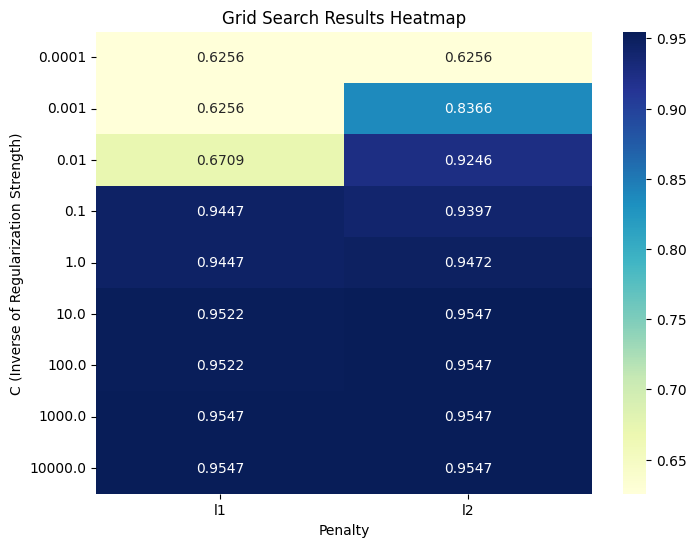

In [34]:
pivot_table = results_df.pivot(index='param_C', columns='param_penalty', values='mean_test_score')
pivot_table.index = pivot_table.index.astype(float)

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt=".4f", cmap='YlGnBu')
plt.title('Grid Search Results Heatmap')
plt.xlabel('Penalty')
plt.ylabel('C (Inverse of Regularization Strength)')
plt.show()
